In [1249]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy import stats
from collections import Counter
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

# **Introduction**

For this exercise, we will use a dataset from the Home Credit default risk machine learning competition. This consists of historical loan application data provided by Home Credit, which provides lines of credit to the unbanked population. 

# **Exploring the Data**

In [1250]:
sns.set_style("white")

In [1251]:
app_train = pd.read_csv('./input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [1252]:
app_test = pd.read_csv('./input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Number of datapoints: 307511

Number of variables: 122

Since this dataset is extremely large, we will only select the following variables for this exercise.

**Continuous Variables**

AMT_INCOME_TOTAL

AMT_CREDIT

AMT_ANNUITY

AMT_GOODS_PRICE

DAYS_EMPLOYED

DAYS_BIRTH

CNT_FAM_MEMBERS

**Categorical Variables**

NAME_CONTRACT_TYPE

CODE_GENDER

**Target Variable**

TARGET

0 - if loan was repaid on time

1 - if client had payment difficulties

In [1253]:
df = app_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

df.columns = ['TARGET',
              'NAME_CONTRACT_TYPE',
              'CODE_GENDER',
              'AMT_INCOME_TOTAL',
              'AMT_CREDIT',
              'AMT_ANNUITY',
              'AMT_GOODS_PRICE',
              'DAYS_EMPLOYED',
              'DAYS_BIRTH',
              'CNT_FAM_MEMBERS']

df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH,CNT_FAM_MEMBERS
0,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,-637,-9461,1.0
1,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,-1188,-16765,2.0
2,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,-225,-19046,1.0
3,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,-3039,-19005,2.0
4,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,-3038,-19932,1.0


In [1254]:
df.dtypes

TARGET                  int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
AMT_GOODS_PRICE       float64
DAYS_EMPLOYED           int64
DAYS_BIRTH              int64
CNT_FAM_MEMBERS       float64
dtype: object

In [1255]:
df.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH,CNT_FAM_MEMBERS
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307509.000000
mean,0.080729,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,63815.045904,-16036.995067,2.152665
std,0.272419,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,141275.766519,4363.988632,0.910682
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-17912.000000,-25229.000000,1.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-2760.000000,-19682.000000,2.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-1213.000000,-15750.000000,2.000000
75%,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-289.000000,-12413.000000,3.000000
max,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,365243.000000,-7489.000000,20.000000


In [1256]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

**Missing Values**

In [1257]:
df.isnull().sum()

TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY            12
AMT_GOODS_PRICE       278
DAYS_EMPLOYED           0
DAYS_BIRTH              0
CNT_FAM_MEMBERS         2
dtype: int64

AMT_ANNUITY has 12 missing values, and AMT_GOODS_PRICE has 278 missing values. Let's try to drop these and check again.

In [1258]:
df = df.dropna()
print(df)

        TARGET NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  \
0            1         Cash loans           M        202500.000    406597.5   
1            0         Cash loans           F        270000.000   1293502.5   
2            0    Revolving loans           M         67500.000    135000.0   
3            0         Cash loans           F        135000.000    312682.5   
4            0         Cash loans           M        121500.000    513000.0   
5            0         Cash loans           M         99000.000    490495.5   
6            0         Cash loans           F        171000.000   1560726.0   
7            0         Cash loans           M        360000.000   1530000.0   
8            0         Cash loans           F        112500.000   1019610.0   
9            0    Revolving loans           M        135000.000    405000.0   
10           0         Cash loans           F        112500.000    652500.0   
11           0         Cash loans           F       

In [1259]:
df['TARGET'].value_counts()

0    282417
1     24804
Name: TARGET, dtype: int64

In [1260]:
df.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH,CNT_FAM_MEMBERS
count,307221.000000,3.072210e+05,3.072210e+05,307221.000000,3.072210e+05,307221.000000,307221.000000,307221.000000
mean,0.080737,1.688326e+05,5.993163e+05,27120.452357,5.383973e+05,63851.095221,-16038.787130,2.152626
std,0.272431,2.372199e+05,4.025196e+05,14492.106811,3.694484e+05,141305.918999,4363.852714,0.910623
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-17912.000000,-25229.000000,1.000000
25%,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,-2760.000000,-19684.000000,2.000000
50%,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,-1213.000000,-15753.000000,2.000000
75%,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-289.000000,-12415.000000,3.000000
max,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,365243.000000,-7489.000000,20.000000


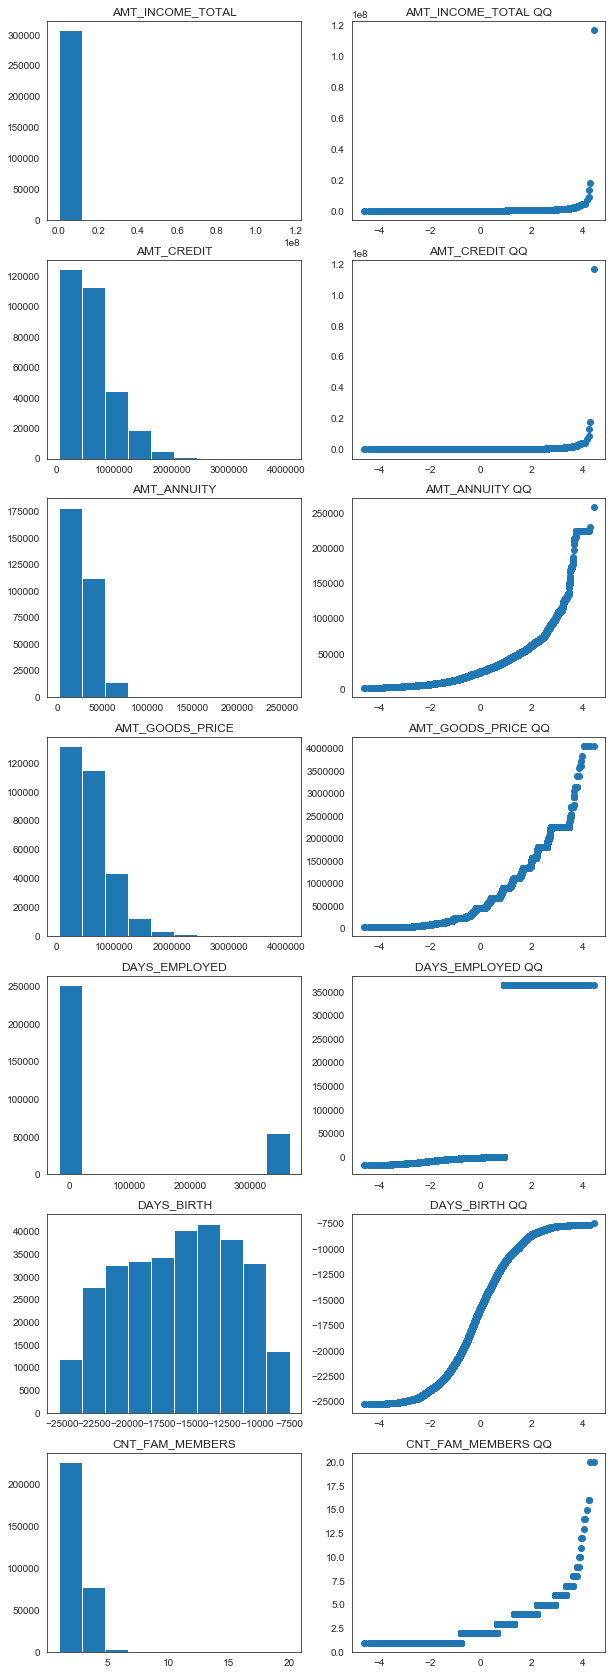

In [1261]:
f, ax = plt.subplots(figsize=(10,30))
norm = sorted(np.random.normal(0,1,307221))

plt.subplot(7,2,1)
plt.hist(df['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')

plt.subplot(7,2,2)
plt.scatter(norm, sorted(df.AMT_INCOME_TOTAL))
plt.title('AMT_INCOME_TOTAL QQ')

plt.subplot(7,2,3)
plt.hist(df['AMT_CREDIT'])
plt.title('AMT_CREDIT')

plt.subplot(7,2,4)
plt.scatter(norm, sorted(df.AMT_INCOME_TOTAL))
plt.title('AMT_CREDIT QQ')

plt.subplot(7,2,5)
plt.hist(df['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')

plt.subplot(7,2,6)
plt.scatter(norm, sorted(df.AMT_ANNUITY))
plt.title('AMT_ANNUITY QQ')

plt.subplot(7,2,7)
plt.hist(df['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')

plt.subplot(7,2,8)
plt.scatter(norm, sorted(df.AMT_GOODS_PRICE))
plt.title('AMT_GOODS_PRICE QQ')

plt.subplot(7,2,9)
plt.hist(df['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED')

plt.subplot(7,2,10)
plt.scatter(norm, sorted(df.DAYS_EMPLOYED))
plt.title('DAYS_EMPLOYED QQ')

plt.subplot(7,2,11)
plt.hist(df['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')

plt.subplot(7,2,12)
plt.scatter(norm, sorted(df.DAYS_BIRTH))
plt.title('DAYS_BIRTH QQ')

plt.subplot(7,2,13)
plt.hist(df['CNT_FAM_MEMBERS'])
plt.title('CNT_FAM_MEMBERS')

plt.subplot(7,2,14)
plt.scatter(norm, sorted(df.CNT_FAM_MEMBERS))
plt.title('CNT_FAM_MEMBERS QQ')

plt.show()

The QQ plots reveal that none of the distributions are normal. AMT_INCOME_TOTAL and AMT_CREDIT appear to have heavy-tailed distributions, while AMT_ANNUITY and AMT_GOODS_PRICE are right-skewed.

In [1262]:
df_jittered = df.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']].dropna()
df_jittered.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH,CNT_FAM_MEMBERS
0,202500.0,406597.5,24700.5,351000.0,-637,-9461,1.0
1,270000.0,1293502.5,35698.5,1129500.0,-1188,-16765,2.0
2,67500.0,135000.0,6750.0,135000.0,-225,-19046,1.0
3,135000.0,312682.5,29686.5,297000.0,-3039,-19005,2.0
4,121500.0,513000.0,21865.5,513000.0,-3038,-19932,1.0


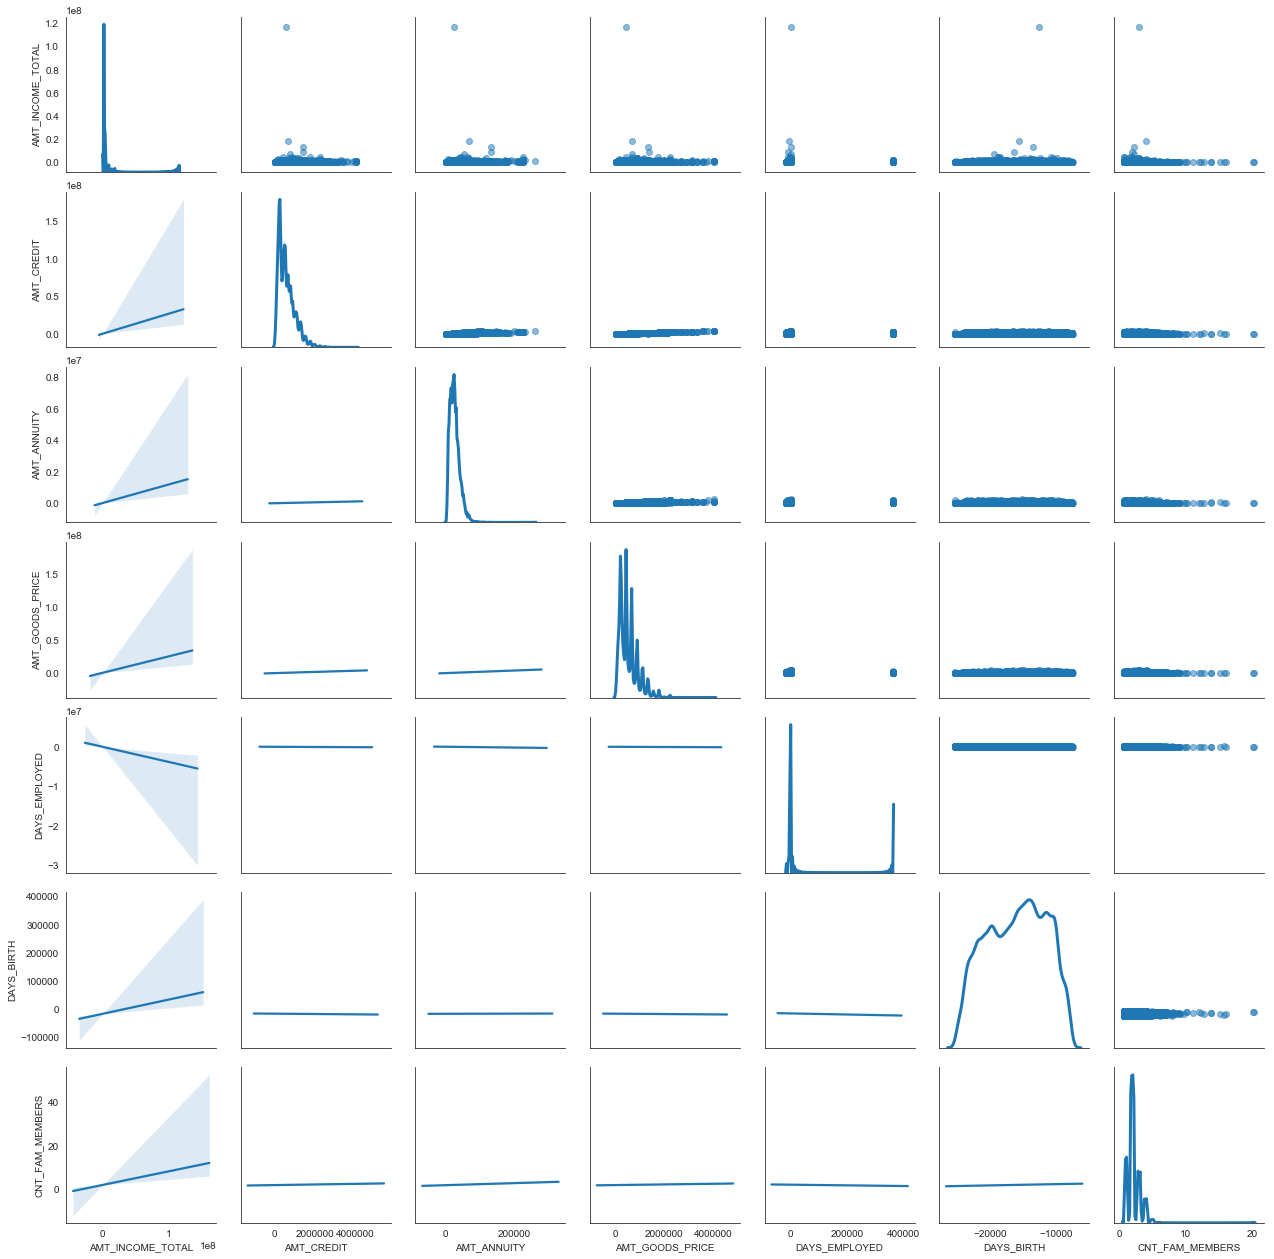

In [1263]:
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

df_jittered = df_jittered.add(jitter)

g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

plt.show()

In [1264]:
corrmat = df.corr()
print(corrmat)

                    TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
TARGET            1.000000         -0.003963   -0.030390    -0.012819   
AMT_INCOME_TOTAL -0.003963          1.000000    0.156725     0.191512   
AMT_CREDIT       -0.030390          0.156725    1.000000     0.769940   
AMT_ANNUITY      -0.012819          0.191512    0.769940     1.000000   
AMT_GOODS_PRICE  -0.039647          0.159607    0.986968     0.775109   
DAYS_EMPLOYED    -0.044983         -0.064258   -0.067055    -0.104608   
DAYS_BIRTH        0.078384          0.027342   -0.055112     0.009892   
CNT_FAM_MEMBERS   0.009306          0.016371    0.063283     0.075709   

                  AMT_GOODS_PRICE  DAYS_EMPLOYED  DAYS_BIRTH  CNT_FAM_MEMBERS  
TARGET                  -0.039647      -0.044983    0.078384         0.009306  
AMT_INCOME_TOTAL         0.159607      -0.064258    0.027342         0.016371  
AMT_CREDIT               0.986968      -0.067055   -0.055112         0.063283  
AMT_ANNUITY           

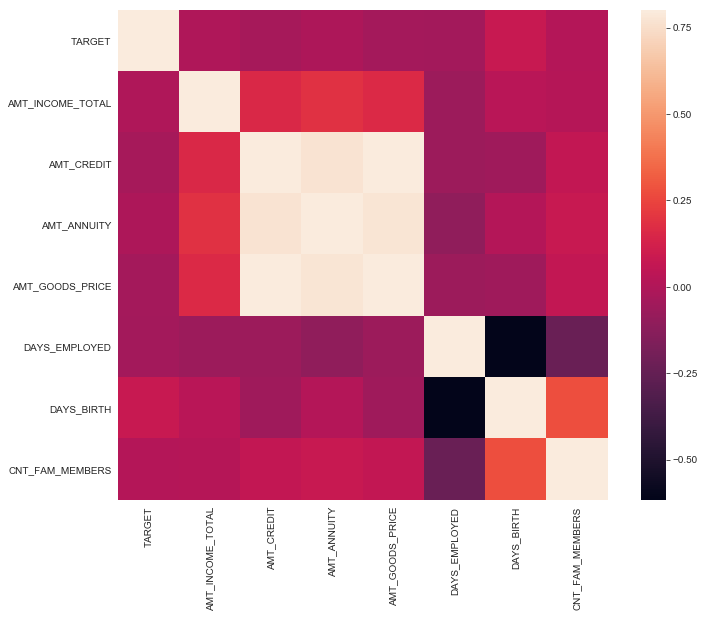

In [1265]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [1266]:
df_long = df[['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

df_long.head()

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH,CNT_FAM_MEMBERS
0,Cash loans,202500.0,406597.5,24700.5,351000.0,-637,-9461,1.0
1,Cash loans,270000.0,1293502.5,35698.5,1129500.0,-1188,-16765,2.0
2,Revolving loans,67500.0,135000.0,6750.0,135000.0,-225,-19046,1.0
3,Cash loans,135000.0,312682.5,29686.5,297000.0,-3039,-19005,2.0
4,Cash loans,121500.0,513000.0,21865.5,513000.0,-3038,-19932,1.0


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


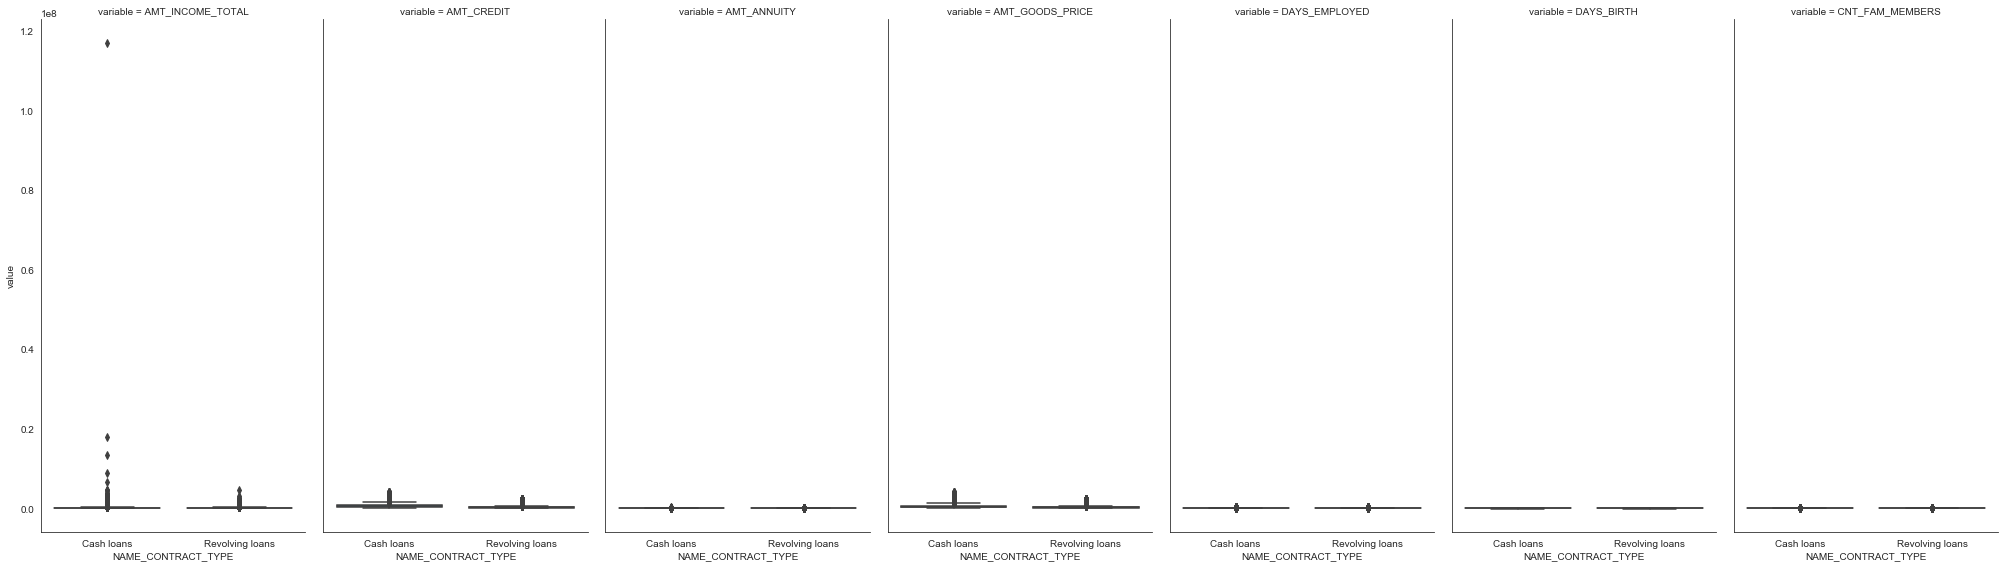

                   AMT_ANNUITY                                               \
                         count          mean           std     min      25%   
NAME_CONTRACT_TYPE                                                            
Cash loans            278220.0  28244.263958  14167.189802  1615.5  18103.5   
Revolving loans        29001.0  16339.208131  13077.030037  6750.0   9000.0   

                                               AMT_CREDIT                ...   \
                        50%      75%       max      count           mean ...    
NAME_CONTRACT_TYPE                                                       ...    
Cash loans          26086.5  35694.0  258025.5   278220.0  627968.410529 ...    
Revolving loans     13500.0  18000.0  225000.0    29001.0  324443.467467 ...    

                   DAYS_EMPLOYED              TARGET                           \
                             75%       max     count      mean       std  min   
NAME_CONTRACT_TYPE                  

In [1267]:
df_long = pd.melt(df_long, id_vars=['NAME_CONTRACT_TYPE'])

g = sns.FacetGrid(df_long, col="variable", size=8, aspect=.5)
g = g.map(sns.boxplot, "NAME_CONTRACT_TYPE", "value")
plt.show()

print(df.groupby('NAME_CONTRACT_TYPE').describe())

for col in df.loc[:,'AMT_INCOME_TOTAL':'AMT_GOODS_PRICE'].columns:
    print(col)
    print(stats.ttest_ind(
        df[df['NAME_CONTRACT_TYPE'] == 'Cash loans'][col].dropna(),
        df[df['NAME_CONTRACT_TYPE'] == 'Revolving loans'][col].dropna()
    ))

# **Feature Engineering**

**Feature 1**

Differentiate rows by the type of loan, either cash loans or revolving loans.

In [1268]:
features = pd.get_dummies(df['NAME_CONTRACT_TYPE'])

features['contract_type'] = np.where((df['NAME_CONTRACT_TYPE'].isin(['Cash loans'])), 1, 0)

print(pd.crosstab(features['contract_type'], df['NAME_CONTRACT_TYPE']))

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
contract_type                                  
0                            0            29001
1                       278220                0


**Feature 2**

Differentiate rows by gender, either male or female.

In [1269]:
features['gender'] = np.where((df['CODE_GENDER'].isin(['M'])), 1, 0)

print(pd.crosstab(features['gender'], df['CODE_GENDER']))

CODE_GENDER       F       M  XNA
gender                          
0            202251       0    4
1                 0  104966    0


**Features 3-6**

Ratio features based upon our continuous variables.

In [1270]:
features['DAYS_EMPLOYED_PERCENTAGE'] = df['DAYS_EMPLOYED']/df['DAYS_BIRTH']
features['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
features['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
features['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
features['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

features.head()

,Cash loans,Revolving loans,contract_type,gender,DAYS_EMPLOYED_PERCENTAGE,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,1,0,1,1,0.067329,0.498036,202500.0,0.121978,0.060749
1,1,0,1,0,0.070862,0.208736,135000.0,0.132217,0.027598
2,0,1,0,1,0.011814,0.500000,67500.0,0.100000,0.050000
3,1,0,1,0,0.159905,0.431748,67500.0,0.219900,0.094941
4,1,0,1,1,0.152418,0.236842,121500.0,0.179963,0.042623


**Features 7-10**

Transform non-normal variables into normal distributions using various transformations.

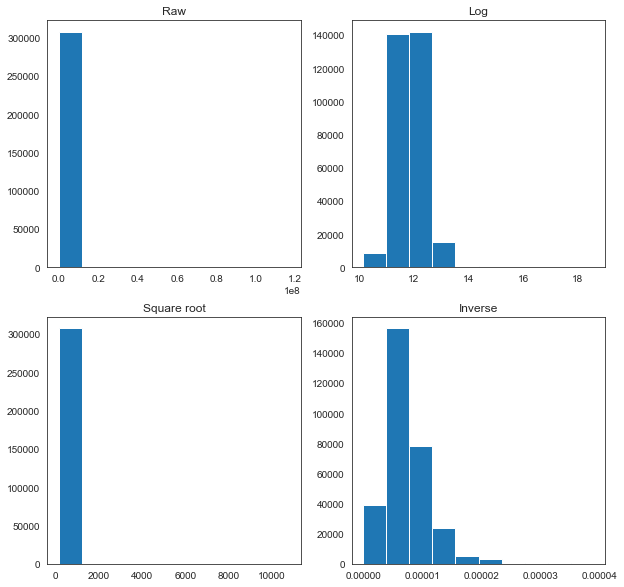

In [1271]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(221)
plt.hist(df['AMT_INCOME_TOTAL'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['AMT_INCOME_TOTAL'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['AMT_INCOME_TOTAL'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['AMT_INCOME_TOTAL'].dropna())
plt.title('Inverse')
plt.show()

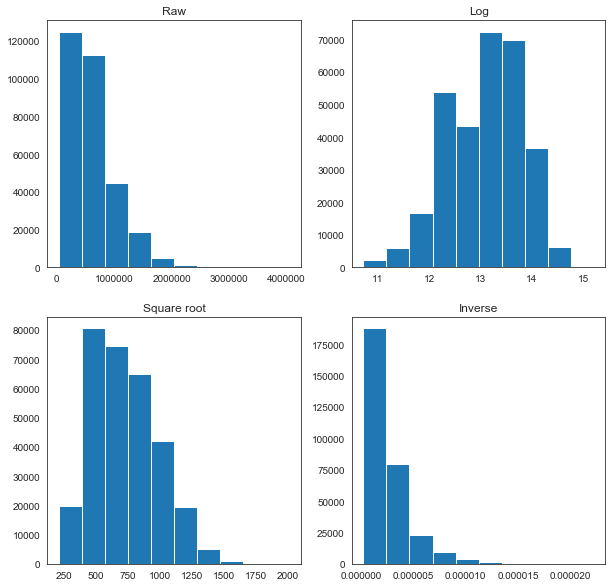

In [1272]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(221)
plt.hist(df['AMT_CREDIT'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['AMT_CREDIT'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['AMT_CREDIT'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['AMT_CREDIT'].dropna())
plt.title('Inverse')
plt.show()

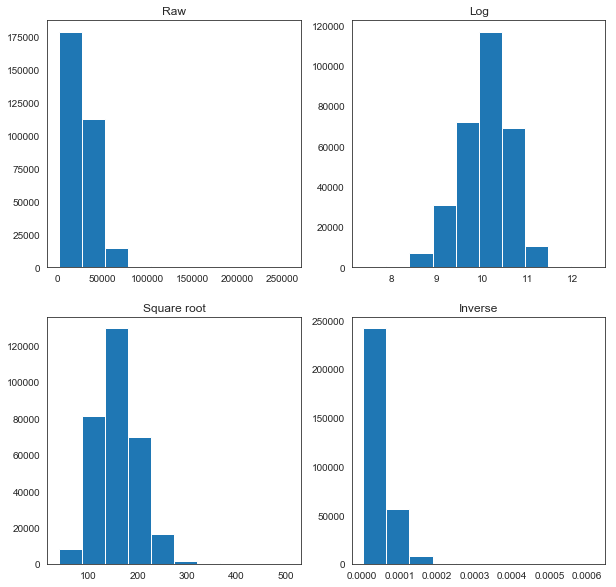

In [1273]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(221)
plt.hist(df['AMT_ANNUITY'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['AMT_ANNUITY'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['AMT_ANNUITY'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['AMT_ANNUITY'].dropna())
plt.title('Inverse')
plt.show()

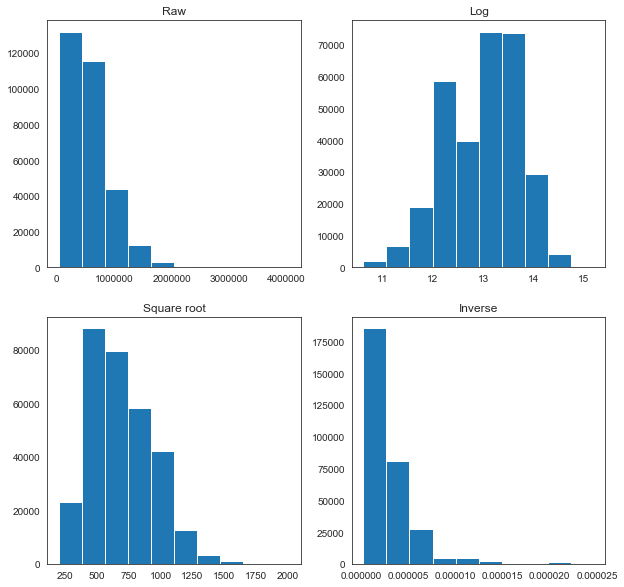

In [1274]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(221)
plt.hist(df['AMT_GOODS_PRICE'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['AMT_GOODS_PRICE'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['AMT_GOODS_PRICE'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['AMT_GOODS_PRICE'].dropna())
plt.title('Inverse')
plt.show()

None of the transformations look optimal, but for the sake of simplicity, we will use the log transformation for each of these variables, as it appears closest to a normal distribution in each case.

In [1275]:
features['log_AMT_INCOME_TOTAL'] = np.log(df['AMT_INCOME_TOTAL'])
features['log_AMT_CREDIT'] = np.log(df['AMT_CREDIT'])
features['log_AMT_ANNUITY'] = np.log(df['AMT_ANNUITY'])
features['log_AMT_GOODS_PRICE'] = np.log(df['AMT_GOODS_PRICE'])

features.head()

,Cash loans,Revolving loans,contract_type,gender,DAYS_EMPLOYED_PERCENTAGE,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,log_AMT_INCOME_TOTAL,log_AMT_CREDIT,log_AMT_ANNUITY,log_AMT_GOODS_PRICE
0,1,0,1,1,0.067329,0.498036,202500.0,0.121978,0.060749,12.218495,12.915579,10.114579,12.768542
1,1,0,1,0,0.070862,0.208736,135000.0,0.132217,0.027598,12.506177,14.072864,10.482864,13.937286
2,0,1,0,1,0.011814,0.500000,67500.0,0.100000,0.050000,11.119883,11.813030,8.817298,11.813030
3,1,0,1,0,0.159905,0.431748,67500.0,0.219900,0.094941,11.813030,12.652944,10.298448,12.601487
4,1,0,1,1,0.152418,0.236842,121500.0,0.179963,0.042623,11.707670,13.148031,9.992665,13.148031


# **Filtering Methods**

Now let's calculate the eigenvalues in order to filter our new features.

In [1276]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = df.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00000325  0.15672504  0.19151286  0.1596074  -0.06425839  0.02734181
   0.01637096]
 [ 0.15672504  1.00000325  0.76994288  0.98697158 -0.06705522 -0.05511243
   0.06328275]
 [ 0.19151286  0.76994288  1.00000325  0.7751118  -0.10460866  0.00989235
   0.0757088 ]
 [ 0.1596074   0.98697158  0.7751118   1.00000325 -0.06484497 -0.05344208
   0.06118033]
 [-0.06425839 -0.06705522 -0.10460866 -0.06484497  1.00000325 -0.61590792
  -0.23363736]
 [ 0.02734181 -0.05511243  0.00989235 -0.05344208 -0.61590792  1.00000325
   0.27905365]
 [ 0.01637096  0.06328275  0.0757088   0.06118033 -0.23363736  0.27905365
   1.00000325]]


In [1277]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 7).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.16641609]
 [ 0.57837723]
 [ 0.53449229]
 [ 0.57942582]
 [-0.09764964]
 [ 0.01685039]
 [ 0.08093076]]
Eigenvalue 1: 2.763951825025901
----------------------------------------
Eigenvector 2: 
[[ 0.04228559]
 [-0.08442229]
 [-0.02596341]
 [-0.08507797]
 [-0.62499447]
 [ 0.65350783]
 [ 0.40679464]]
Eigenvalue 2: 1.7781964580507592
----------------------------------------
Eigenvector 3: 
[[-0.96325971]
 [ 0.11191025]
 [ 0.03518478]
 [ 0.1087502 ]
 [ 0.03426714]
 [-0.00739369]
 [ 0.21286931]]
Eigenvalue 3: 0.9556584341924335
----------------------------------------
Eigenvector 4: 
[[-0.19874613]
 [ 0.03744995]
 [ 0.04188913]
 [ 0.03884844]
 [-0.3460087 ]
 [ 0.24234247]
 [-0.88169251]]
Eigenvalue 4: 0.8263242094268115
----------------------------------------
Eigenvector 5: 
[[ 0.00155355]
 [ 0.70352403]
 [ 0.0094712 ]
 [-0.71058203]
 [ 0.00412712]
 [ 0.0037848 ]
 [-0.00190643]]
Eigenvalue 5: 0.012980129577330003
----------------------------------------
Eigenvector 6: 
[[-

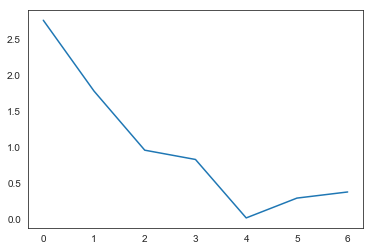

In [1278]:
plt.plot(eig_val_cov)
plt.show()

The scree plot and the eigenvalues > 1 rule indicate that we should keep only the first two components. Now we will create P, transform X into Y, and look at how well our new components correlate with our old variables.

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


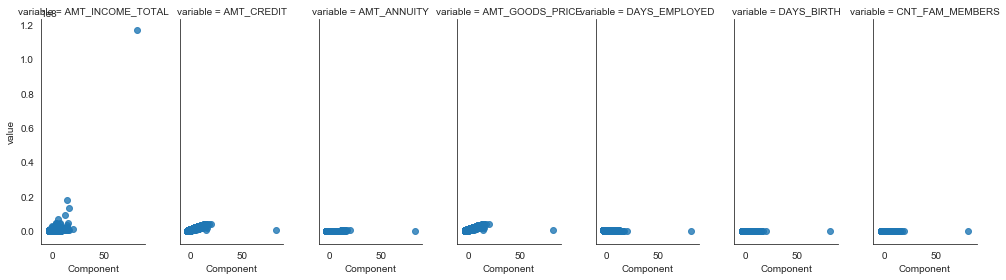

In [1279]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.39484898  0.25402724  0.13652219  0.11804593  0.05344421  0.04125716
  0.0018543 ]


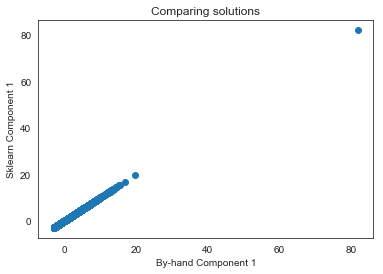

In [1280]:
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

Ultimately we have a solution that encompasses over 64% of the variance in the data in just two components, rather than seven variables. Thus, we will only keep the following five features:

INCOME_CREDIT_PERC

INCOME_PER_PERSON

ANNUITY_INCOME_PERC

log_AMT_INCOME_TOTAL

log_AMT_CREDIT